In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving spotify-2023.csv to spotify-2023.csv


In [4]:
df = pd.read_csv('spotify-2023.csv', encoding='latin1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


1. Завдання полягає в тому, щоб побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань.

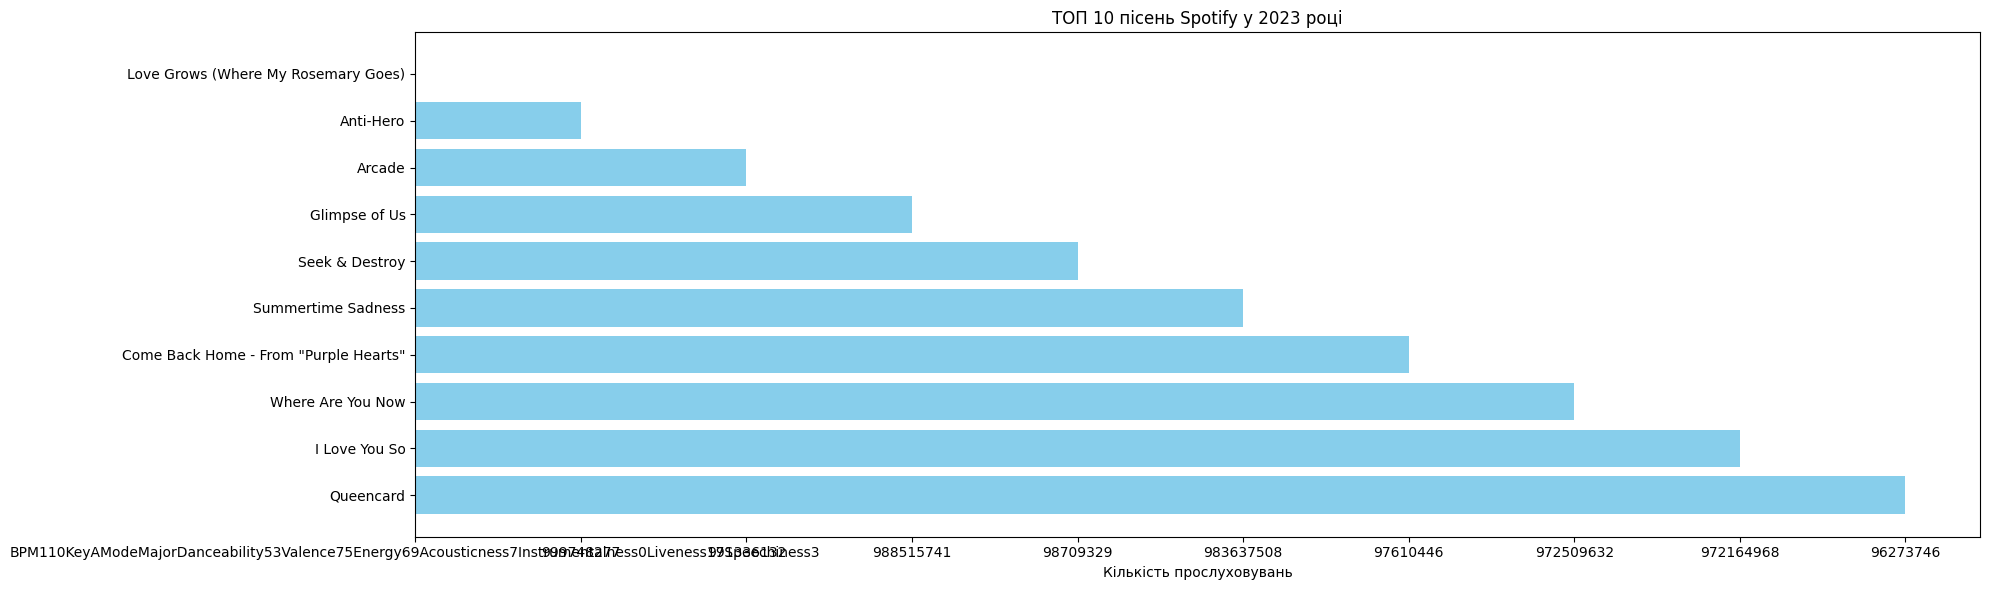

In [6]:
top_10_songs = df.sort_values(by='streams', ascending=False).head(10)

plt.figure(figsize=(20, 6))
plt.barh(top_10_songs['track_name'], top_10_songs['streams'], color='skyblue')
plt.xlabel('Кількість прослуховувань')
plt.title('ТОП 10 пісень Spotify у 2023 році')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

2. Побудувати точковий графік, який покаже залежність між кількістю плейлистів Spotify, у які додано пісню, та кількістю її прослуховувань.

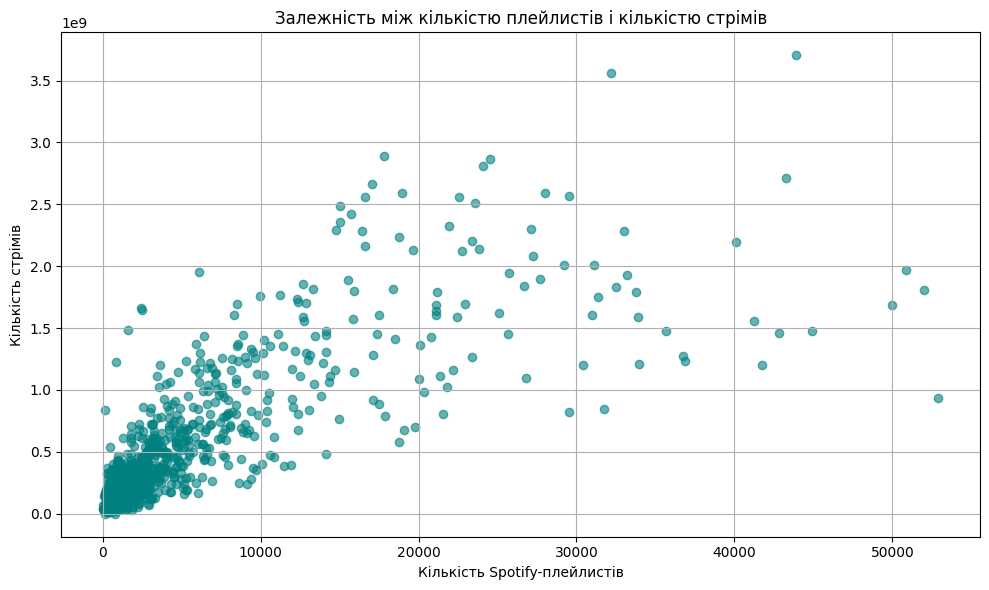

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['in_spotify_playlists'], df['streams'], alpha=0.6, color='teal')
plt.title('Залежність між кількістю плейлистів і кількістю стрімів')
plt.xlabel('Кількість Spotify-плейлистів')
plt.ylabel('Кількість стрімів')
plt.grid(True)
plt.tight_layout()
plt.show()

3. Побудувати гістограму для danceability_%, щоб подивитись, які пісні — більш чи менш танцювальні — переважають у наборі.


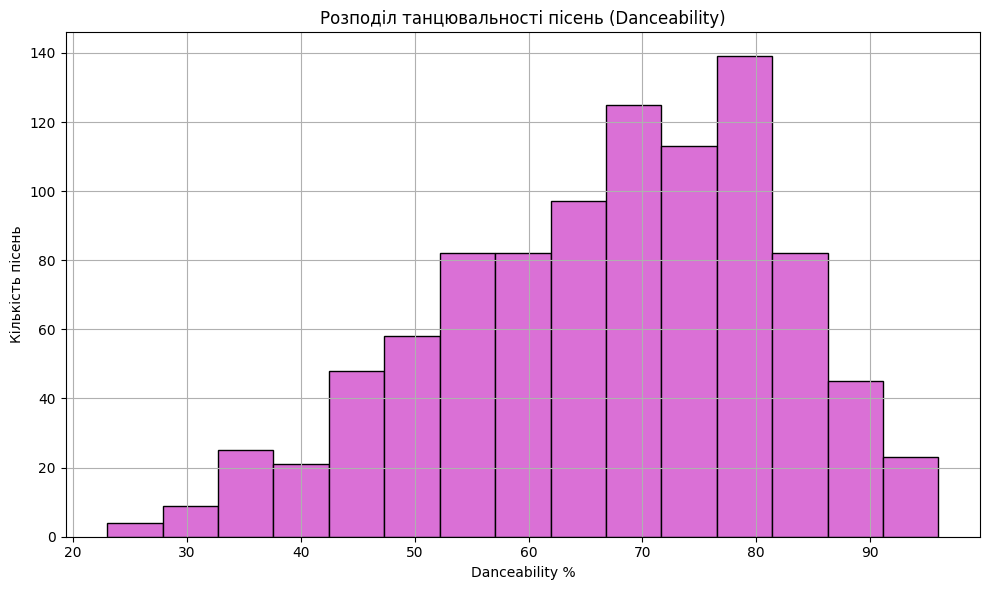

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['danceability_%'], bins=15, color='orchid', edgecolor='black')
plt.title('Розподіл танцювальності пісень (Danceability)')
plt.xlabel('Danceability %')
plt.ylabel('Кількість пісень')
plt.grid(True)
plt.tight_layout()
plt.show()

4. Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.


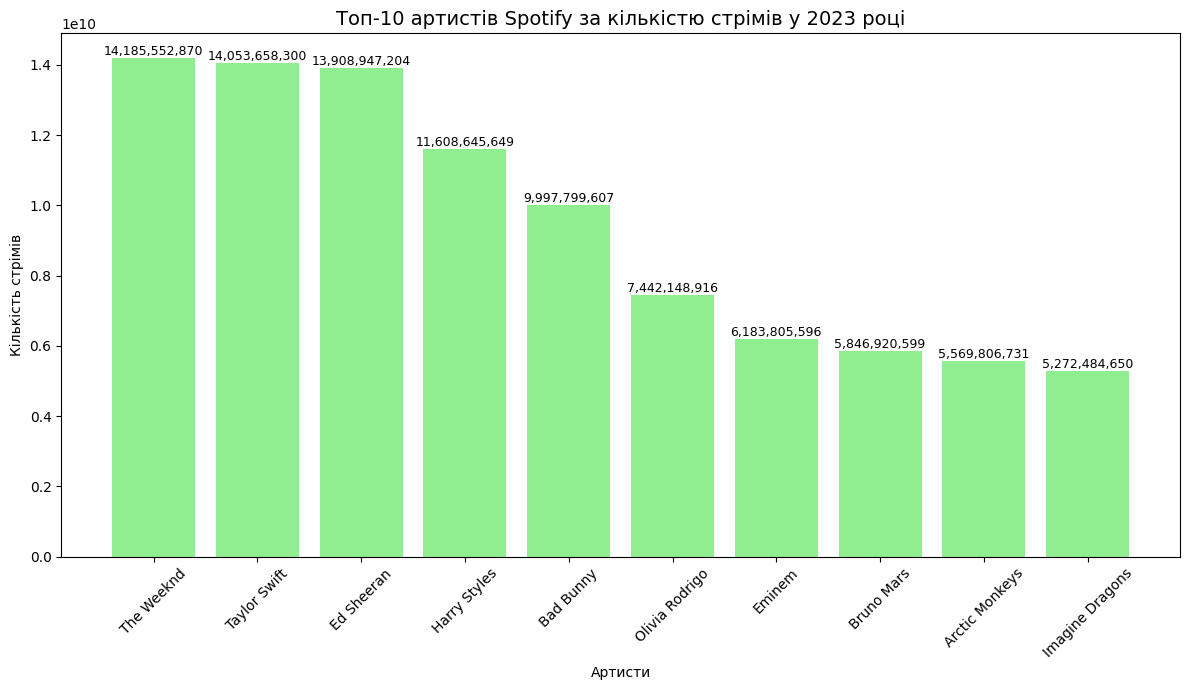

In [14]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

top_artists = df.groupby('artist(s)_name')['streams'].sum().nlargest(10).reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
bars = plt.bar(top_artists['artist(s)_name'], top_artists['streams'], color='lightgreen')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.title("Топ-10 артистів Spotify за кількістю стрімів у 2023 році", fontsize=14)
plt.xlabel("Артисти")
plt.ylabel("Кількість стрімів")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5. Порівняння популярності трьох треків: Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році.

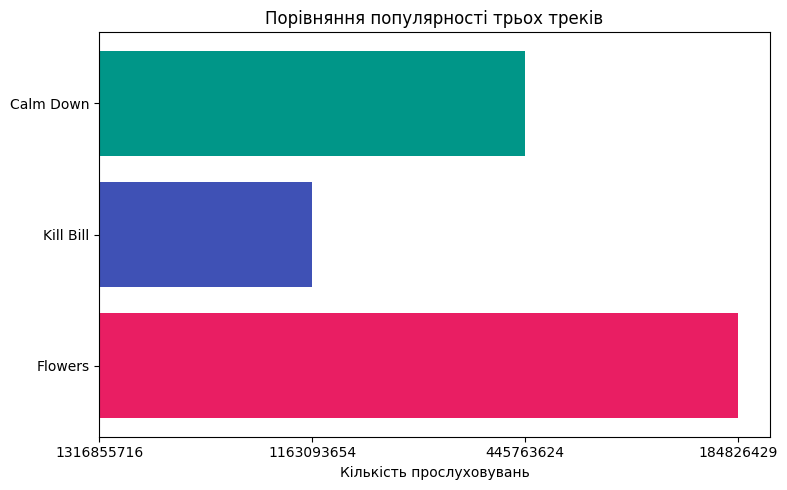

In [7]:
selected_tracks = ['Flowers', 'Kill Bill', 'Calm Down']
subset = df[df['track_name'].isin(selected_tracks)]

plt.figure(figsize=(8, 5))
plt.barh(subset['track_name'], subset['streams'], color=['#E91E63', '#3F51B5', '#009688'])
plt.xlabel('Кількість прослуховувань')
plt.title('Порівняння популярності трьох треків')
plt.tight_layout()
plt.show()